In [30]:
'''Las bibliotecas a utilizar, teniendo en cuanta que el time se utiliza para contabilidad el tiempo en la
realización de un cierto código'''
import numpy as np
import matplotlib.pyplot as plt
from time import time
import random

In [31]:
'''np.zeros llenar mi matriz de ceros inicialmente, el fill rellena la matriz con un valor, en este caso será 
la temperatura inicial llamada (Tini), imprimiendo T puede observar que la matriz T está rellena del valor inicial
excepto las fronteras'''

def condiciones(nx,ny,Ttop,Tbottom,Tleft,Tright,Tini):
    T = np.zeros((nx, ny))
    T.fill(Tini)
#print(T)

# Condiciones de frontera
    T[0, :] = Ttop
    T[-1, :] = Tbottom
    T[:, -1] = Tright
    T[:, 0] = Tleft
    return T


In [32]:
'''En este caso es de gran utilidad el np.roll ya que en mis valores de frontera tienen el altercado que no poder
realizar diferencias finitas, porque en sus extremos me faltaría un valor para completar dicha operación, 
El np.roll lo soluciona, ese comando desplaza elementos de la matriz como uno lo desee.
Diferencias finitas T[i, j] = T[i,j]+(T[i,j-1]+T[i-1,j]-4*T[i,j]+T[i+1,j]+T[i,j+1])'''

def iteration(T):
    tmp = np.zeros(T.shape)
    tmp=T+0.25*(np.roll(T,1,axis=0)+np.roll(T,-1,axis=0)+np.roll(T,1,axis=1)+np.roll(T,-1,axis=1)-4*T)
    return tmp

In [33]:
'''Se muestra el proceso de diferencias finitas utilizando for, aunque es claro que el optimo es iteration (con roll)'''
def iteration1(T):
    tmp = np.zeros(T.shape)

    for i in range(1, T.shape[0]-1):
        for j in range(1, T.shape[1]-1):
            tmp[i,j] = T[i,j]+0.25*(T[i,j-1]+T[i-1,j]-4*T[i,j]+T[i+1,j]+T[i,j+1])
    return tmp


0.36162471771240234


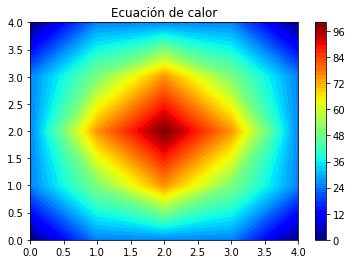

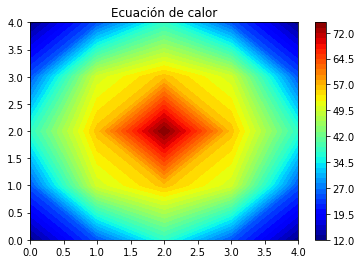

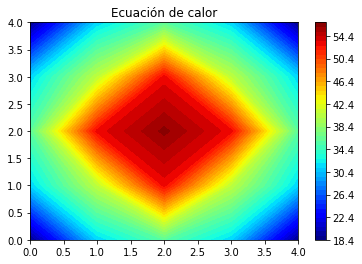

<Figure size 432x288 with 0 Axes>

In [34]:
'''Guarda las iteraciones, depende de a iteración que deseeo la puedo llamar con j.
Además, observe que está función es recursiva ya que se llama a sí misma y a partir del valor que retorna
de nuevo lo proceso y va ejecutando la función iteration'''

def guardaT(j,T0):
    P=T0
    for i in range(j):
        if i>=0:
            P=iteration(P)
    return P
    
#Condiciones iniciales
T=condiciones(5,5,0,0,0,0,100)

#Llamando a la función y pidiendo solo la iteración dada
#J=guardaT(4,T)
#print(J)
#plt.imshow(J)


t0=time()
for i in range(3):
    T = iteration(T)
    colorinterpolation=50
    colourMap=plt.cm.jet
    plt.title('Ecuación de calor')
    plt.contourf(T, colorinterpolation, cmap=colourMap)
    plt.colorbar()
    #print(T)
    plt.figure()
plt.imshow(T)
plt.clf()
x=input()
t1=time()
tt=t1-t0
print(tt)
#print(J)

[[215.75    194.46875 189.84375 151.21875 188.71875]
 [197.96875 205.03125 156.5625  161.78125 170.9375 ]
 [186.625   174.78125 149.      131.53125 159.59375]
 [185.5     171.78125 148.25    128.53125 158.46875]
 [194.96875 202.78125 152.4375  159.53125 167.9375 ]]
[[131.109375 123.203125 112.453125 102.078125 117.90625 ]
 [130.421875 128.078125 109.515625 106.953125 117.21875 ]
 [129.109375 124.578125 108.640625 103.453125 115.90625 ]
 [127.609375 120.578125 107.640625  99.453125 114.40625 ]
 [126.421875 125.078125 104.015625 103.953125 113.21875 ]]
[[223.       201.640625 194.9375   156.765625 194.953125]
 [204.203125 210.453125 160.625    165.578125 176.15625 ]
 [192.671875 179.703125 152.9375   134.828125 164.625   ]
 [192.25     178.578125 152.65625  133.703125 164.203125]
 [203.078125 209.609375 159.078125 164.734375 175.03125 ]]
[[246.640625 212.515625 206.984375 165.890625 217.5     ]
 [227.25     228.609375 169.       181.984375 198.109375]
 [213.984375 193.234375 160.15625  1

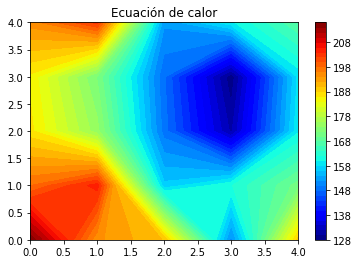

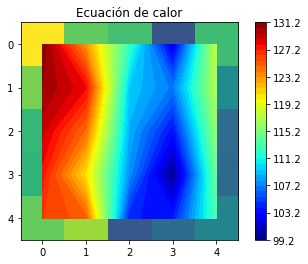

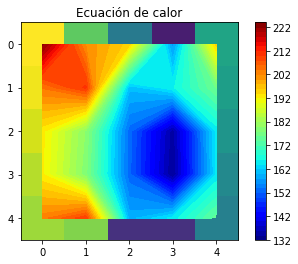

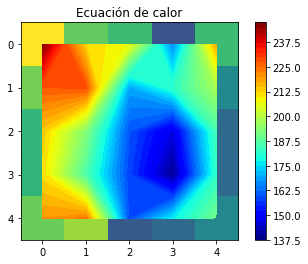

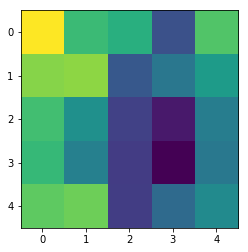

In [43]:
'''OBJETIVO: Generar tablas con matrices y respectivos gráficos, cada tabla o txt este representada por unas 
condiciones aleatorias aleatorias pero se va a mostrar en todos los tipos de txt la iteración que se desee'''

'''El comando rand.seed() genera números aleatorios, según las fuentes es establecer una semilla'''
    
'''El for i in range que aparece a continuación es la cantidad de tablas que se va a generar, en este caso serán 4 tablas
Cada uno con unas condiciones de frontera diferentes, lo que no va a cambiar es:
La dimensión de la matriz y la condición inicial '''




for i in range(4):
    Te = condiciones(5,5, random.randrange(100,500),random.randrange(10,100),random.randrange(100,500),random.randrange(10,100), 100)

#Es claro que aquí no es necesario llamar la función iteration, ya que a partir de la función guarT esta la llama
#Además esta función es útil porque solo se quiere imprimir una iteración específica.

    Tem= guardaT(3,Te)
    colorinterpolation=50
    colourMap=plt.cm.jet
    plt.title('Ecuación de calor')
    plt.contourf(Tem, colorinterpolation, cmap=colourMap)
    plt.colorbar()
    plt.figure()
    plt.imshow(Tem)
    print(Tem)
    np.savetxt('Tem.txt',Tem,fmt="%s")
    plt.savefig('Temperatura.png')
    
